In [18]:
import sklearn
import os
from moviepy.editor import VideoFileClip
import pandas as pd
import matplotlib.pyplot as plt

print(sklearn.__version__)

1.3.2


In [13]:
def get_video_metadata(filepath, exercise_name, execise_type):

    try:
        clip = VideoFileClip(filepath)
        # Extract metadata
        duration = clip.duration
        width, height = clip.size
        fps = clip.fps

        res = {
            "Filename": exercise_name,
            "Duration (seconds)": duration,
            "Width": width,
            "Height": height,
            "FPS": fps,
            "Exercise type": execise_type
            }

        return res
    except Exception as e:
        print(f"Error processing file {filepath}: {e}")
        return None

In [ ]:

video_folder = "data/raw_data/"

# List to hold video metadata
video_data = []

# Iterate over each video in the folder
for exercise_folder in os.listdir(video_folder):
    full_exercise_folder = os.path.join(video_folder,exercise_folder)
    for filename in os.listdir(full_exercise_folder):
        if filename.endswith(".mp4"):
            filepath = os.path.join(full_exercise_folder, filename)
            exercise = exercise_folder

            video_data.append(get_video_metadata(filepath, filename, exercise))
            

# Create a DataFrame
meta_data = pd.DataFrame(video_data)

print(meta_data[:10])


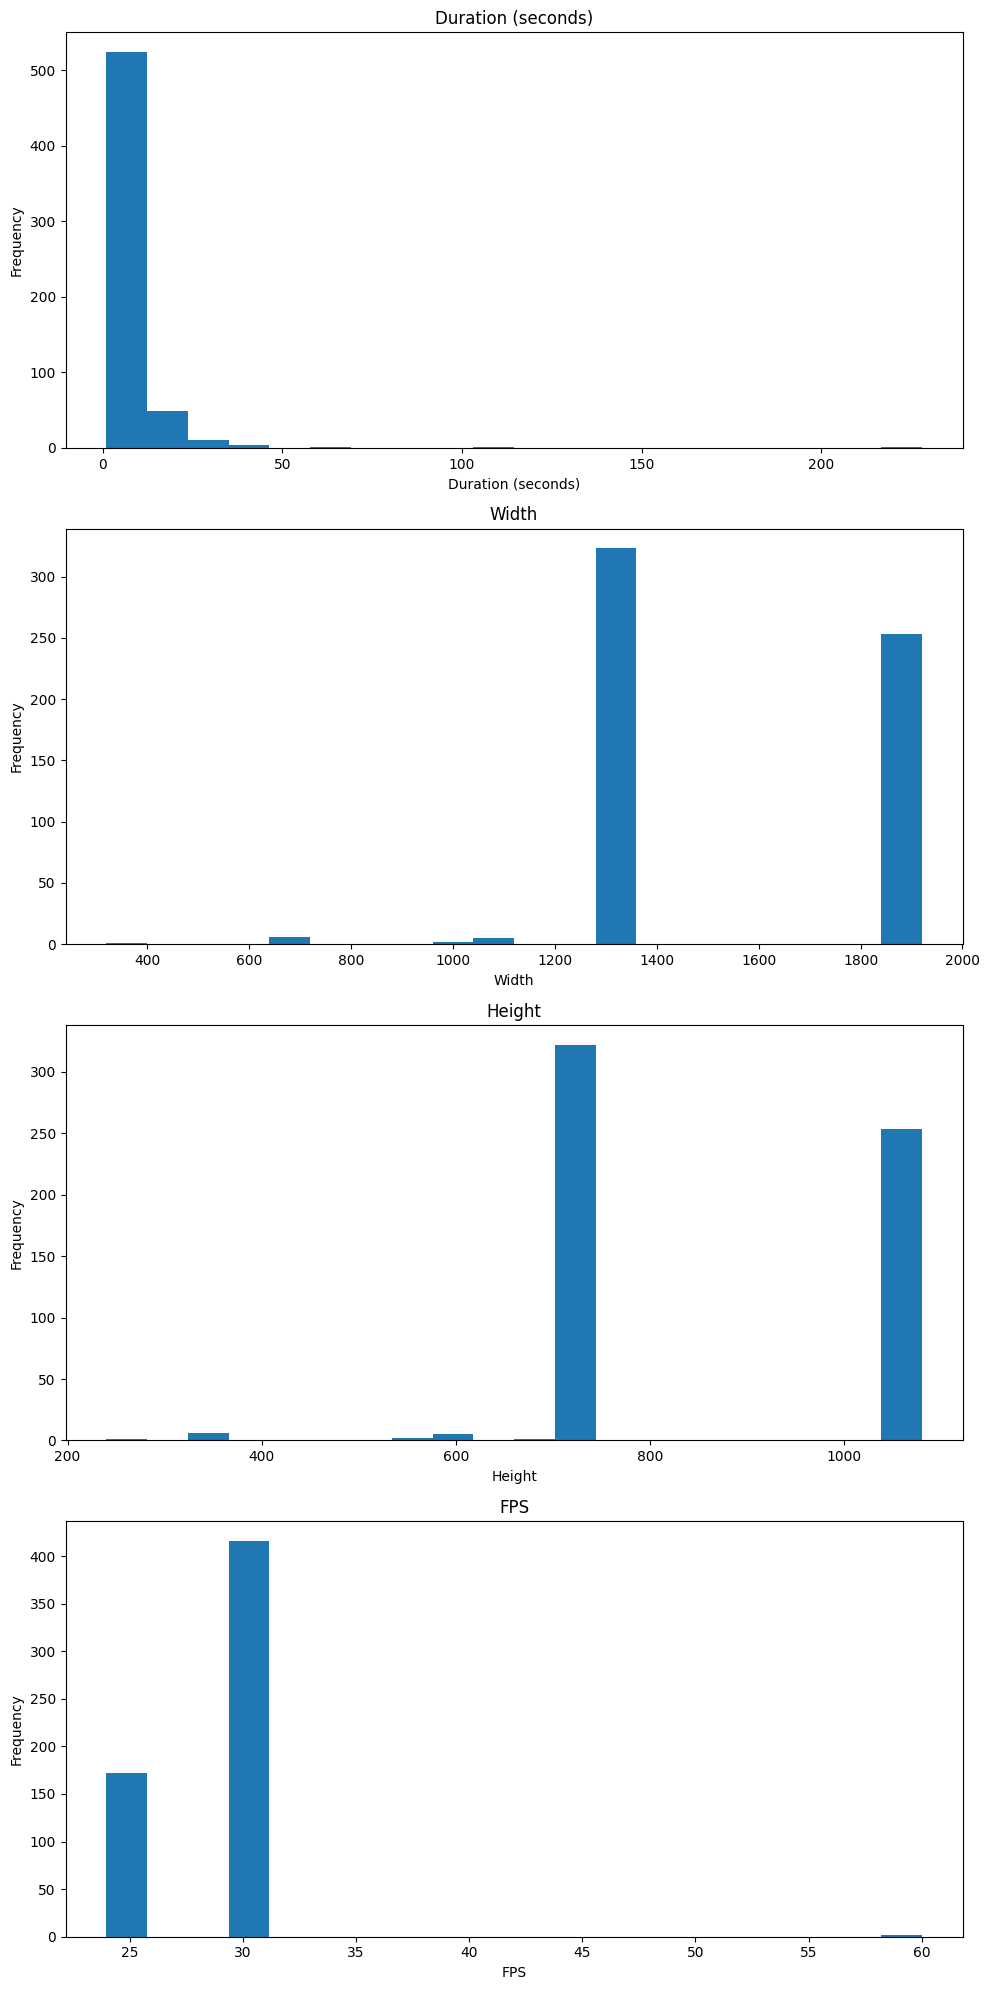

In [21]:
# Filter out the columns that are not in the DataFrame
columns = ["Duration (seconds)", "Width", "Height", "FPS"]

# Number of valid columns
num_columns = len(columns)

# Set up the matplotlib figure
fig, axs = plt.subplots(num_columns, figsize=(10, 5 * num_columns))

# Iterate over each valid column and plot a histogram
for i, column in enumerate(columns):
    # If there's only one column, axs will not be an array
    ax = axs[i] if num_columns > 1 else axs
    
    # Plotting the histogram
    meta_data[column].plot(kind='hist', ax=ax, bins=20, title=column)
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')

# Adjust layout for better readability
plt.tight_layout()
plt.show()

# Example usage
# Assuming 'df' is your pandas DataFrame
# columns = ['column1', 'column2', 'column3']
# plot_selected_histograms(df, columns)